# House Price Prediction using Linear Regression
---

#### Objective
This project focuses on using linear regression to model housing prices, providing insights into how key property attributes contribute to property valuation. 

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

# Setting visualization style
sns.set(style="whitegrid")

Data Source: [Kaggle USA House Prices dataset](https://www.kaggle.com/datasets/fratzcan/usa-house-prices/data)

In [2]:
# Loading the dataset into a dataframe
housing_df=pd.read_csv("USA Housing Dataset.csv")

In [3]:
# Displaying the first 5 rows
housing_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [4]:
# Checking the shape of the dataset
print(f"The dataset contains {housing_df.shape[0]} rows and {housing_df.shape[1]} columns.")

# Getting a summary of the dataset using descriptive statistics
print("\nSummary of the numerical columns:")
housing_df.describe().T

The dataset contains 4140 rows and 18 columns.

Summary of the numerical columns:


,count,mean,std,min,25%,50%,75%,max
price,4140.0,553062.877289,583686.452245,0.0,320000.00,460000.00,659125.0,26590000.00
bedrooms,4140.0,3.400483,0.903939,0.0,3.00,3.00,4.0,8.00
bathrooms,4140.0,2.163043,0.784733,0.0,1.75,2.25,2.5,6.75
sqft_living,4140.0,2143.638889,957.481621,370.0,1470.00,1980.00,2620.0,10040.00
sqft_lot,4140.0,14697.638164,35876.838123,638.0,5000.00,7676.00,11000.0,1074218.00
floors,4140.0,1.514130,0.534941,1.0,1.00,1.50,2.0,3.50
waterfront,4140.0,0.007488,0.086219,0.0,0.00,0.00,0.0,1.00
view,4140.0,0.246618,0.790619,0.0,0.00,0.00,0.0,4.00
condition,4140.0,3.452415,0.678533,1.0,3.00,3.00,4.0,5.00
sqft_above,4140.0,1831.351449,861.382947,370.0,1190.00,1600.00,2310.0,8020.00


Right-skewed (positive skew) distribution: A few large values pull the mean higher than the median in some features like price and sqft_lot.

In [5]:
# Getting further information about the dataset 
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [6]:
# Checking for missing values
housing_df.isnull().any().any()

False

In [7]:
# Identifying categorical and numerical variables
categorical_vars = housing_df.select_dtypes(include=['object']).columns.tolist()
numerical_vars = housing_df.select_dtypes(include=['number']).columns.tolist()

print(f"\nThis dataset have {len(categorical_vars)} Categorical Variables and {len(numerical_vars)} Numerical Variables.")
print("\nThe categorical variables are:", categorical_vars)
print("\nThe numerical variables are:", numerical_vars)


This dataset have 5 Categorical Variables and 13 Numerical Variables.

The categorical variables are: ['date', 'street', 'city', 'statezip', 'country']

The numerical variables are: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


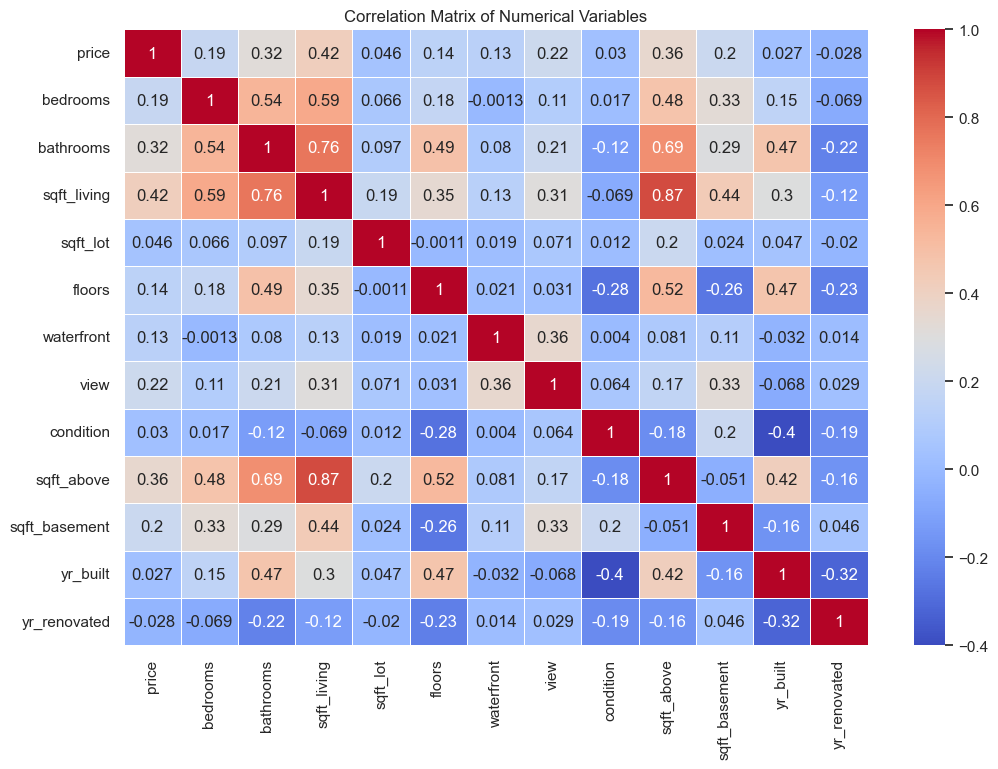

In [8]:
# Multivariate analysis: Showing correlation matrix of numerical variables with Heatmap 
plt.figure(figsize=(12, 8))
correlation_matrix = housing_df[numerical_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [9]:
# Change date from object to datetime
housing_df['date'] = pd.to_datetime(housing_df['date'])
# Extract year from date and check the unique values
housing_df['date'].dt.year.unique()

array([2014])

In [10]:
# Extract month from date and check the unique values
housing_df['date'].dt.month.unique()   

array([5, 6, 7])

In [11]:
# Dropping irrelevant columns
housing_df = housing_df.drop(['date', 'street', 'country'], axis=1)

The date variable was excluded because it did not vary significantly across the dataset. All houses were sold within a very short range (May to July 2014) and won’t add meaningful information to the linear regression model.

In [12]:
# Encoding categorical features
housing_df = pd.get_dummies(housing_df, columns=['city', 'statezip'], drop_first=True)

In [13]:
# Displaying the first 2 rows to confirm changes
housing_df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,...,False,False,False,False,False,False,False,False,False,False
1,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Remove extreme outliers in price, sqft_living and sqft_lot
housing_df = housing_df[housing_df['price'] < housing_df['price'].quantile(0.99)]
housing_df = housing_df[housing_df['sqft_living'] < housing_df['sqft_living'].quantile(0.99)]
housing_df = housing_df[housing_df['sqft_lot'] < housing_df['sqft_lot'].quantile(0.99)]


In [15]:
# Define the feature and the target
X = housing_df.drop('price', axis=1)
y = housing_df['price']

In [16]:
# Confirming the shape of the feature matrix
X.shape

(4016, 130)

In [17]:
# Confirming the shape of the target vector
y.shape

(4016,)

In [18]:
# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [19]:
# Standardizing feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Initialize the Linear Regression model
model = LinearRegression()

In [21]:
# Training the Linear Regression model
model.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error and the coefficient of determination (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 23212832150.45
R^2 Score: 0.73


In [23]:
# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 152357.58


### Interpretation

- The R² score of 0.73 indicates that the model explains about 73% of the variation in house prices, which reflects a good fit for a simple linear model.
- The RMSE of 152357.58 means that, on average, the model’s predictions differ from the actual prices by about $152,000.
- This level of accuracy suggests the model captures most major pricing patterns, though additional feature engineering or advanced models (like Ridge or Random Forest) could further improve precision.

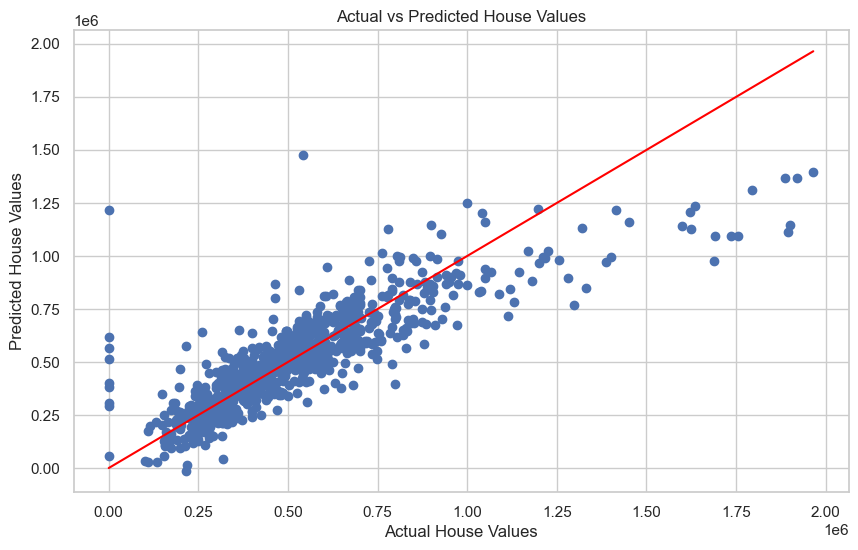

In [24]:
# Visualizing actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Line showing perfect predictions
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('Actual vs Predicted House Values')
plt.show()

In [25]:
# Display the coefficient and intercept of the linear model
intercept = model.intercept_
print("Intercept:", intercept)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
coefficients.T

Intercept: 514293.5238402611


,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
Feature,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
Coefficient,-13373.442712,13487.359941,2530211790968927232.0,2794.700017,-9903.858243,11700.225597,41344.85532,18369.363589,-2367895334227113984.0,-1333738294469157120.0,...,320753063867419072.0,258773643110464512.0,295518313357536192.0,243073990379787712.0,229703703634857888.0,170047194886857856.0,255714769784336928.0,284749584923251008.0,-3134556638274349568.0,-341402147566359424.0
